## Sonar Data with Logistic Regression

PROBLEM DESCRIPTION:

The file “dataminesrocks.csv” contains 208 patterns obtained by 1)bouncing sonar signals off a metal cylinder at various angles and under various conditions, and 2) from bouncing sonar signals off rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 features in the range 0.0 to 1.0. Each feature representing the energy within a particular frequency band, integrated over a certain period of time. 

The label associated with each record contains "Rock" or "Mine".

Three trained human subjects were each tested on 100 signals, chosen at random from the set of 208 returns used to create this data set. Their responses ranged between 88% and 97% correct. However, they may have been using information from the raw sonar signal that is not preserved in the processed data sets presented here.

Can we design a model that improves the above performance?

References: 

https://datahub.io/machine-learning/sonar#readme
https://www.openml.org/d/40

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing data set

In [2]:
dataset=pd.read_csv("dataminerocks.csv")
dataset.head(15)

,Unnamed: 0,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
5,6,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,Rock
6,7,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,Rock
7,8,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,Rock
8,9,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,Rock
9,10,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,Rock


### Determining the balance on the binary response

In [6]:
occurrences = dataset['Class'].value_counts()
print(occurrences)

Mine    111
Rock     97
Name: Class, dtype: int64


In [9]:
# Percent of Mines
percMines=111/(111+97)*100
print(percMines)

53.36538461538461


In [10]:
#Percent of Rocks
percRocks=97/(111+97)*100
print(percRocks)

46.63461538461539


### Label encoding the response variable

In [18]:
# Encoding dependent variable using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Class"]=le.fit_transform(dataset["Class"])
print(dataset["Class"])

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Class, Length: 208, dtype: int64


### Create y and X

In [19]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

In [20]:
print(X)
print(y)

[[1.00e+00 2.00e-02 3.71e-02 ... 8.40e-03 9.00e-03 3.20e-03]
 [2.00e+00 4.53e-02 5.23e-02 ... 4.90e-03 5.20e-03 4.40e-03]
 [3.00e+00 2.62e-02 5.82e-02 ... 1.64e-02 9.50e-03 7.80e-03]
 ...
 [2.06e+02 5.22e-02 4.37e-02 ... 1.38e-02 7.70e-03 3.10e-03]
 [2.07e+02 3.03e-02 3.53e-02 ... 7.90e-03 3.60e-03 4.80e-03]
 [2.08e+02 2.60e-02 3.63e-02 ... 3.60e-03 6.10e-03 1.15e-02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Spliting data into training and test sets

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature scaling

In [32]:
#For logistic regression is not necessary BUT, it tends to enhance the performance.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc=sc_X
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test) #Not fit_transform to avoid information leakage

In [33]:
print(X_train)

[[ 1.00250576  0.55755787 -0.29891405 ... -0.4267949   0.10009367
  -0.35347414]
 [ 1.49715278 -1.04478083 -1.10841889 ... -0.22144732 -0.97786942
  -0.66857108]
 [-1.6026352  -0.27690106  0.006207   ...  0.25243171 -0.31206869
  -0.78673244]
 ...
 [ 0.1945823  -0.25470801 -0.83131916 ... -0.50577473 -0.24865909
  -0.45194193]
 [-0.95959408  0.38889064 -0.28646013 ... -0.36361102  0.10009367
  -0.03837719]
 [ 1.10143517 -0.46776135  0.22103713 ... -0.4267949  -0.09013511
  -0.78673244]]


In [34]:
print(X_test)

[[-1.53668226e+00 -9.16061099e-01 -8.93588761e-01 ... -3.00427154e-01
  -3.12068688e-01 -5.89796848e-01]
 [-4.15482357e-01 -2.50269395e-01 -1.24738788e-02 ... -7.58510216e-01
   4.01289238e-01  1.99005940e+00]
 [-1.19042935e+00  6.95154826e-01  3.23781977e-01 ...  4.41983325e-01
  -3.12068688e-01  8.47832969e-01]
 ...
 [ 4.61881938e-02  1.39201681e+00  3.14441537e-01 ...  5.84147034e-01
   5.28108424e-01  7.49365173e-01]
 [-1.30584699e+00 -5.96481081e-01 -1.65034406e-01 ... -9.16469892e-01
  -8.82755028e-01  1.00992611e-03]
 [-6.92294438e-02  2.20223410e-01 -7.44141714e-01 ...  4.73848652e+00
   7.50042001e-01  1.85220448e+00]]


### Creating logistic regression model on training set

In [35]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Prediction of new result

In [10]:
#classifier.predict(sc_X.transform([[30,87000]]))

array([0])

In [11]:
#print(classifier.predict(sc_X.transform([[30,87000]])))

[0]


### Predict test results

In [36]:
classifier.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

In [37]:
print(classifier.predict(X_test))

[1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0]


In [38]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


### Calculating the confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[26,  0],
       [ 3, 23]])

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(26, 0, 3, 23)

### Plotting the confusion matrix

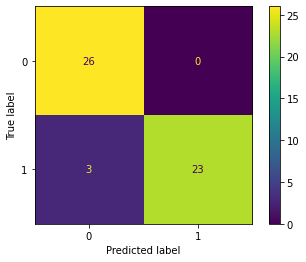

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

### Calculation of accuracy

Accuracy estimates the number of correct predictions among the total number of predictions made

In [42]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)*100
print(acc)

94.23076923076923


In [43]:
acc2=(tp+tn)/(tp+fp+tn+fn)*100
print(acc2)

94.23076923076923


### Plot ROC

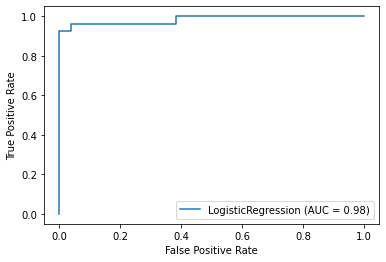

In [44]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()  

### Precision score

Precision answer the question: Of all the cases that the model PREDICTED as TRUE (positive), what percent was actually TRUE (positive). This is, what is the fraction of positives that were classified correctly.

In [45]:
from sklearn.metrics import precision_score
pre1=precision_score(y_test, y_pred)*100
print(pre1)

100.0


In [46]:
pre=(tp/(tp+fp))*100
print(pre)

100.0


### Recall score

Recall answers the question: Of all the cases that were actually TRUE (positive), how many dis the model "catch" or predict as TRUE (positive)

In [47]:
from sklearn.metrics import recall_score
rec=recall_score(y_test, y_pred)*100
print(rec)

88.46153846153845


In [48]:
rec1=tp/(tp+fn)*100
print(rec1)

88.46153846153845


### F1 score

F1 = 2 * (precision * recall) / (precision + recall) is the harmonic mean of precision and recall. 
It can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal

In [49]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9387755102040816

Note: When true positive + false positive == 0, precision is undefined. When true positive + false negative == 0, recall is undefined. In such cases, by default the metric will be set to 0, as will f-score, and UndefinedMetricWarning will be raised. This behavior can be modified with zero_division